# En este analisis se ha recopilado informacion por medio del departamento de Marketing para ayudar a aumentar los ingresos de una tienda online

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss
import datetime as dt

In [2]:
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
order = pd.read_csv('/datasets/orders_us.csv')
visit = pd.read_csv ('/datasets/visits_us.csv')

In [3]:
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
def analisis_exploratorio_df(data):
    print(data.head())
    print(data.info())
    print(data.isna().sum())
    print('filas duplicadas', data.duplicated().sum())

In [5]:
analisis_exploratorio_df(hipotesis)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ 

In [6]:
analisis_exploratorio_df(order)

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
filas duplicadas 0


In [7]:
order['date'] = pd.to_datetime(order['date'])
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [8]:
analisis_exploratorio_df(visit)

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
date      0
group     0
visits    0
dtype: int64
filas duplicadas 0


In [9]:
visit['date'] = pd.to_datetime(visit['date'])
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


Realizamos un analisis explotario de cada dataset para ver si encontramos valores nulos, duplicados, etc. En el caso de los dataset de visit y order se encontraba date en un formato incorrecto y se realizo el cambio a datetime64

## Realizaremos pruebas de hipotesis con los dataset que se proporcionar tomando como primer paso el meto ICE / RICE para tomar una desicion sobre que hipotesis probaremos para el incremento de ingresos

In [10]:
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Debemos probar la hipotesis que mas convenga, para este caso tomaremos como metodologia ICE para saber que hipotesis probaremos

In [11]:
hipotesis.iloc[0,0]

'Add two new channels for attracting traffic. This will bring 30% more users'

In [12]:
hipotesis['ICE'] = hipotesis['Impact'] * hipotesis['Confidence'] / hipotesis ['Effort']
hipotesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


Al utilizar el metodo ICE podemos tomar  como primera desicion fila 8 es decir 'Launch a promotion that gives users discounts on their birthdays', ya que esta tiene 16.20 esta se toma porque tiene mas impacto, mas confianza y menor esfuerzo pareciendo en primera estancia una primera y buena opcion

In [13]:
hipotesis['RICE'] = hipotesis['Reach']* hipotesis['Impact'] * hipotesis['Confidence'] / hipotesis ['Effort']
hipotesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [14]:
hipotesis.iloc[0,0]

'Add two new channels for attracting traffic. This will bring 30% more users'

Se utilizo el metodo RICE ya que este es mas preciso ya que le añade el alcanze e incluye mas criterios y es mas robusta, por lo cual concideramos que la mejor eleccion es la fila 7 (Add a subscription form to all the main pages...) con un RICE de 112

## Al haber obtenido por el metodo RICE y deducir que hipotesis tomaremos siendo esta la mas conveniente, podremos trabajar con los datos de los visitantes y ordenes para obtener la tasa de convercion

In [15]:
order['date'] = pd.to_datetime(order['date'])
order

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [16]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [17]:
usuarios_en_ambos_grupos = order.groupby(['visitorId', 'date'])['group'].nunique().sort_values(ascending=False).reset_index().query('group>1')
usuarios_en_ambos_grupos['visitorId']

0     2587333274
1      477780734
2     2579882178
3     2038680547
4     1316129916
5      232979603
6     3891541246
7     1801183820
8     3062433592
9     1230306981
10     237748145
11    3951559397
12    2949041841
13    3963646447
14    2378935119
15    4266935830
16    2686716486
17    3202540741
18    1614305549
19    3717692402
20    2458001652
21    4256040402
22    3766097110
Name: visitorId, dtype: int64

Existen 22 usuarios (visitorId) que se encuentran en ambos grupos y con la misma fecha lo cual estos deberian ser eliminados ya que estan en ambos e implicarios en caer en la duplicidad para ese mismo dia, dañando el analisis

In [18]:
grupo_por_fechas = order[['date', 'group']].drop_duplicates().sort_values(by='date')

In [19]:
order_agg = order[~order['visitorId'].isin(usuarios_en_ambos_grupos['visitorId'])].groupby(['date', 'group']).agg({
    'transactionId': 'nunique',
    'visitorId' : 'nunique',
    'revenue': 'sum'
}).reset_index().sort_values(by=['date', 'group'])

In [20]:
visit_agg = visit.groupby(['date', 'group']).agg({
    'visits': 'sum',
}).reset_index().sort_values(by=['date','group'])

In [21]:
fct_experiment = order_agg.merge(visit_agg, on=['date', 'group'], how='outer')
fct_experiment.isna().sum()

date             0
group            0
transactionId    0
visitorId        0
revenue          0
visits           0
dtype: int64

In [22]:
fct_experiment.columns = ['date', 'group', 'ordenes', 'compradores','ventas_totales', 'visitas']
fct_experiment

,date,group,ordenes,compradores,ventas_totales,visitas
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,19,19,1258.8,713
2,2019-08-02,A,20,19,1503.5,619
3,2019-08-02,B,24,23,2623.8,581
4,2019-08-03,A,24,24,1815.2,507
...,...,...,...,...,...,...
57,2019-08-29,B,16,16,1731.6,531
58,2019-08-30,A,9,8,1228.9,490
59,2019-08-30,B,22,22,3322.6,490
60,2019-08-31,A,10,10,905.0,699


In [23]:
ventas_grupo_A = fct_experiment.query('group == "A"')[['date','ventas_totales', 'ordenes']]

In [24]:
ventas_grupo_B= fct_experiment.query('group == "B"')[['date','ventas_totales', 'ordenes']]

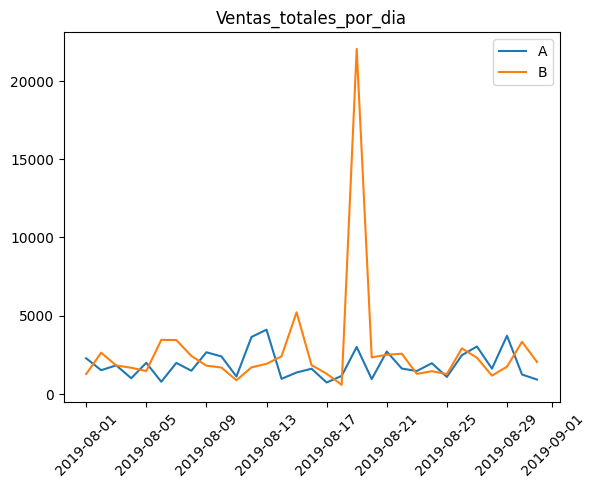

In [25]:
plt.plot(ventas_grupo_A['date'], ventas_grupo_A['ventas_totales'], label = 'A')
plt.plot(ventas_grupo_B['date'], ventas_grupo_B['ventas_totales'], label = 'B')
plt.legend()
plt.title('Ventas_totales_por_dia')
plt.xticks(rotation = 45)
plt.show()

In [26]:
print(ventas_grupo_A.mean())
print(ventas_grupo_B.mean())

ventas_totales    1872.209677
ordenes             16.419355
dtype: float64
ventas_totales    2714.577419
ordenes             19.161290
dtype: float64


En esta grafica se puede observar una comparacion de las ventas totales por dia del grupo A y B, en general las ventas del grupo A son relativamente mayor a B sin embargo al obtener el promedio podemos tener que las ventas totales son mayores para B. Dado que no estamos seguros por estos datos aplicaremos una prueba de hipotesis para comprobar cual tiene mayor numero de ventas totales

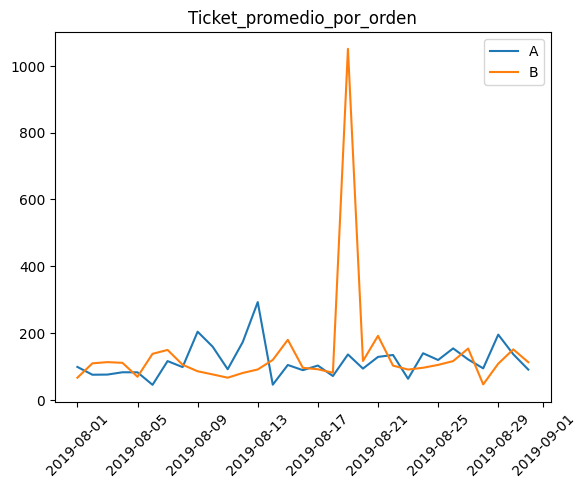

In [27]:
plt.plot(ventas_grupo_A['date'],ventas_grupo_A['ventas_totales'] /ventas_grupo_A['ordenes'], label = 'A')
plt.plot(ventas_grupo_B['date'],ventas_grupo_B['ventas_totales'] /ventas_grupo_B['ordenes'], label = 'B')
plt.legend()
plt.xticks(rotation = 45)
plt.title('Ticket_promedio_por_orden')
plt.show()

En la grafica podemos observar ue el ticket promedio por dia sigue siendo mayor en B que en A. Tendremos que sealizar una prueba de hipotesis para saber si estos datos son coherentes con respecto a la grafica

In [28]:
ventas_totales_A_B = ventas_grupo_A.merge(ventas_grupo_B, how='outer', on ='date', suffixes = ['A', 'B'])
ventas_totales_A_B

,date,ventas_totalesA,ordenesA,ventas_totalesB,ordenesB
0,2019-08-01,2266.6,23,1258.8,19
1,2019-08-02,1503.5,20,2623.8,24
2,2019-08-03,1815.2,24,1806.8,16
3,2019-08-04,990.6,12,1661.8,15
4,2019-08-05,1978.1,24,1449.3,21
5,2019-08-06,763.9,17,3445.0,25
6,2019-08-07,1972.5,17,3435.6,23
7,2019-08-08,1470.0,15,2415.6,23
8,2019-08-09,2651.4,13,1796.6,21
9,2019-08-10,2387.5,15,1674.8,22


In [29]:
ventas_totales_A_B['ingreso_acumuladoA'] = ventas_totales_A_B['ventas_totalesA'].cumsum()

ventas_totales_A_B['ingreso_acumuladoB'] = ventas_totales_A_B['ventas_totalesB'].cumsum()

print(ventas_totales_A_B[['date', 'ingreso_acumuladoA', 'ingreso_acumuladoB']])

         date  ingreso_acumuladoA  ingreso_acumuladoB
0  2019-08-01              2266.6              1258.8
1  2019-08-02              3770.1              3882.6
2  2019-08-03              5585.3              5689.4
3  2019-08-04              6575.9              7351.2
4  2019-08-05              8554.0              8800.5
5  2019-08-06              9317.9             12245.5
6  2019-08-07             11290.4             15681.1
7  2019-08-08             12760.4             18096.7
8  2019-08-09             15411.8             19893.3
9  2019-08-10             17799.3             21568.1
10 2019-08-11             18898.6             22429.3
11 2019-08-12             22528.1             24118.6
12 2019-08-13             26625.0             26028.6
13 2019-08-14             27578.2             28418.5
14 2019-08-15             28935.2             33629.4
15 2019-08-16             30534.3             35451.6
16 2019-08-17             31252.8             36733.1
17 2019-08-18             32

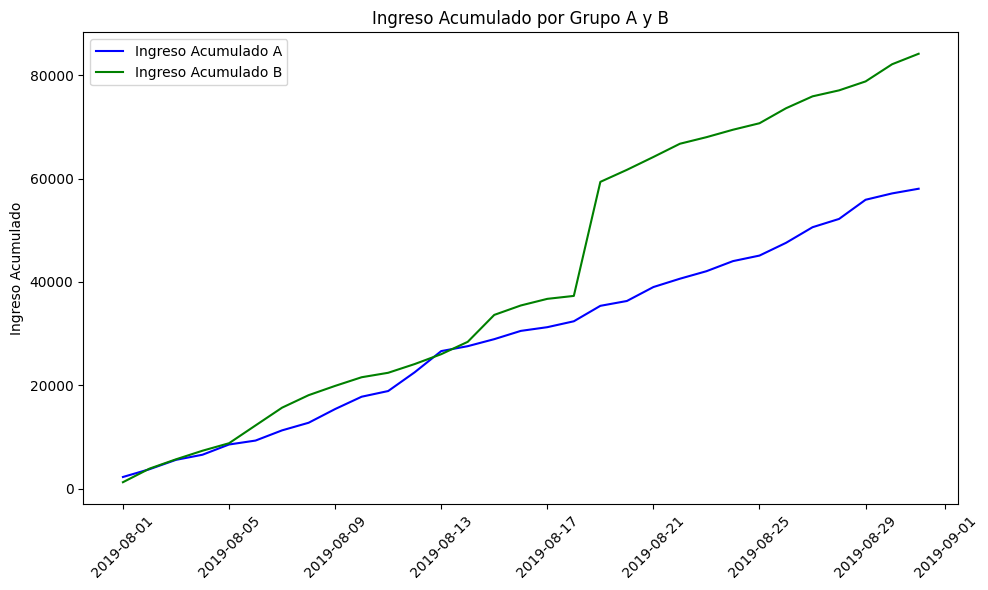

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(ventas_totales_A_B['date'], ventas_totales_A_B['ingreso_acumuladoA'], label='Ingreso Acumulado A', color='blue')
plt.plot(ventas_totales_A_B['date'], ventas_totales_A_B['ingreso_acumuladoB'], label='Ingreso Acumulado B', color='green')

plt.ylabel('Ingreso Acumulado')
plt.title('Ingreso Acumulado por Grupo A y B')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Se ha obtenido las ventas totales de A y B para poder obtener posteriormente el ingreso acomulado de cada uno. Como se muestra en los datos el  ingreso_acumuladoA es de 58038.5 mientras que el ingreso_acumuladoB es de  84151.9. En el grafico se muetra el ingreso acomulado por el grupo A y B atraves del tiempo, donde claramente se puede observar que apartir del 2019-08-17 el grupo B tiende a tener un incremento mayor

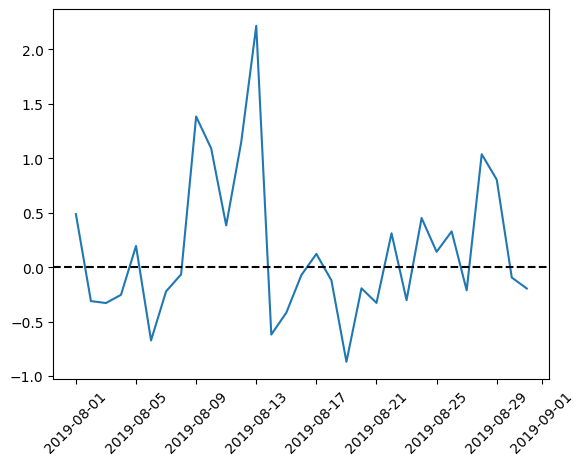

In [31]:
plt.plot(ventas_totales_A_B['date'], 
         (ventas_totales_A_B['ventas_totalesA'] / ventas_totales_A_B['ordenesA']) / 
         (ventas_totales_A_B['ventas_totalesB'] / ventas_totales_A_B['ordenesB'])-1)
plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.show()

En esta grafica observamos que el ticket promedio de B  es mas alto que el A, los que sobrepasan el cero son los que sobrepasaron al grupo A, por lo cual lo que se encuentra por debajo de las linas punteadas es el ticket pormedio que es igaul entre A y B. Por lo general el grupo se se encuentra por ensima de la linea supera a A

In [32]:
fct_experiment ['conversion'] = fct_experiment['ordenes'] / fct_experiment['visitas'] * 100
fct_experiment

,date,group,ordenes,compradores,ventas_totales,visitas,conversion
0,2019-08-01,A,23,19,2266.6,719,3.198887
1,2019-08-01,B,19,19,1258.8,713,2.664797
2,2019-08-02,A,20,19,1503.5,619,3.231018
3,2019-08-02,B,24,23,2623.8,581,4.130809
4,2019-08-03,A,24,24,1815.2,507,4.733728
...,...,...,...,...,...,...,...
57,2019-08-29,B,16,16,1731.6,531,3.013183
58,2019-08-30,A,9,8,1228.9,490,1.836735
59,2019-08-30,B,22,22,3322.6,490,4.489796
60,2019-08-31,A,10,10,905.0,699,1.430615


In [33]:
experimentoA = fct_experiment.query('group == "A"')
experimentoB = fct_experiment.query('group == "B"')

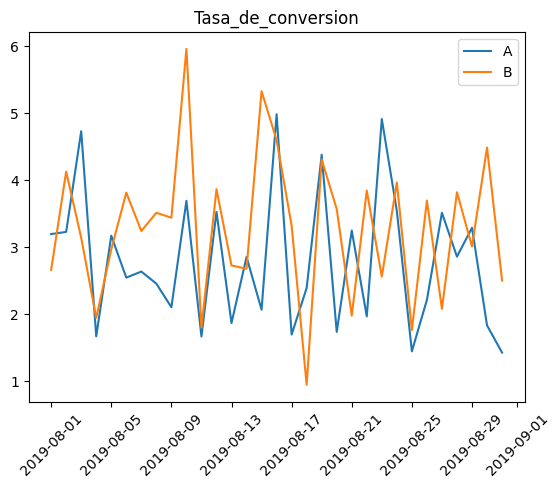

In [34]:
plt.plot(experimentoA['date'], experimentoA['conversion'], label = 'A')
plt.plot(experimentoB['date'], experimentoB['conversion'], label = 'B')
plt.legend()
plt.title('Tasa_de_conversion')
plt.xticks(rotation= 45)
plt.show()

Este grafico se observa la tasa de conversion atraves del tiempo, este grafico nos muestra el número de usuarios que pasaron a ser clientes como porcentaje del total de usuarios que visitaron el sitio, por tanto cuanto mas alta es la tasa de conversion sera mas eficaz, Para este caso el porcentaje mas alto es de 6%, siendo el grupo B el que mas conversion tiene

In [35]:
conversion_A_b = experimentoA[['date', 'conversion']].merge(experimentoB[['date', 'conversion']], how = 'outer', on = 'date', suffixes = ['A', 'B'])
conversion_A_b

,date,conversionA,conversionB
0,2019-08-01,3.198887,2.664797
1,2019-08-02,3.231018,4.130809
2,2019-08-03,4.733728,3.143418
3,2019-08-04,1.673640,1.948052
4,2019-08-05,3.174603,2.970297
5,2019-08-06,2.548726,3.816794
6,2019-08-07,2.639752,3.244006
7,2019-08-08,2.459016,3.516820
8,2019-08-09,2.106969,3.442623
9,2019-08-10,3.694581,5.962060


In [36]:
conversion_A_b.describe()

,conversionA,conversionB
count,31.000000,31.000000
mean,2.804718,3.282377
std,1.026511,1.089179
min,1.430615,0.949796
25%,1.921051,2.614450
50%,2.639752,3.325416
75%,3.404534,3.856779
max,4.986150,5.962060


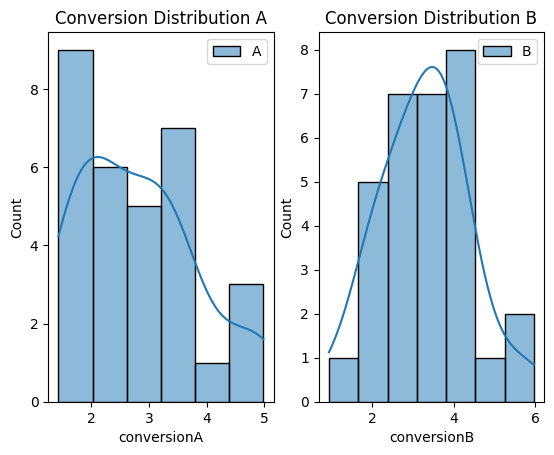

In [37]:
fig, axs = plt.subplots(ncols=2)

# Using histplot, which works with axes
sns.histplot(conversion_A_b['conversionA'], ax=axs[0], label='A', kde=True)
sns.histplot(conversion_A_b['conversionB'], ax=axs[1], label='B', kde=True)
axs[0].legend()
axs[1].legend()
axs[0].set_title("Conversion Distribution A")
axs[1].set_title("Conversion Distribution B")
plt.show()

En este grafico de histograma se observa una clara distribucion diferente ya que la media para A es de 2.804718 y para B 3.282377 por lo tanto no hay una diferencia significativa

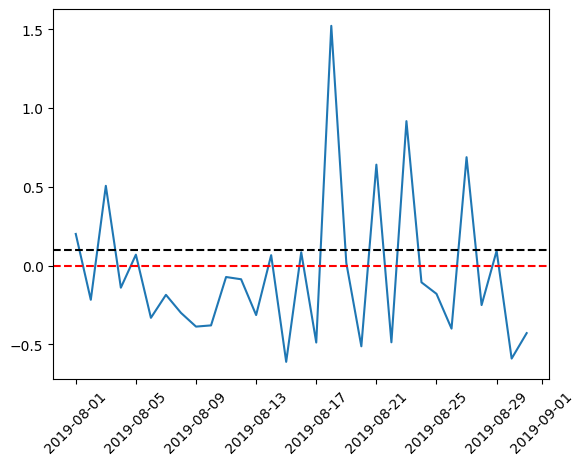

In [38]:
plt.plot(conversion_A_b['date'], conversion_A_b['conversionA']/
        conversion_A_b['conversionB']-1)
plt.xticks(rotation = 45)
plt.title('')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.axhline(y = 0.1, color = 'black', linestyle = '--')
plt.show()

En este grafico se observa la conversion entre A y B, donde la linea roja hacia abajo nos muestra la relacion entre A con B y en las lineas punteadas negras es el maximo para A, donde tambien aqui entre la linae roja y negra nos muestra la diferencia de conversion, siendo mayor para B por ejemplo el 2019-08-04 B supero en un 50% al grupo A

#### Una ves obtenida la tasa de convergencia, que para nuestro caso es lo mas relevante, mostraremos el comportamiento de los usuarios respecto a las ordenes, las ordenes por pedidos asi como las pruebas de hipotesis para saber si debemos considerar a uno de los grupos como líder; Parar la prueba y concluir que no hay diferencia entre los grupos o  continuar la prueba.

In [52]:
order

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [40]:
ordenes_por_usuarios = order.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({
    'transactionId': 'nunique'
})
ordenes_por_usuarios.columns = ['userId', 'ordenes'] 
ordenes_por_usuarios.sort_values(ascending=False, by='ordenes')

,userId,ordenes
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


In [41]:
x_values = pd.Series(range(0, len(ordenes_por_usuarios)))

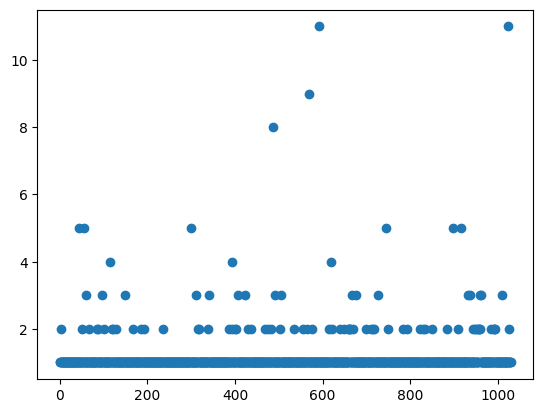

In [42]:
plt.scatter(x_values, ordenes_por_usuarios['ordenes'])

En este grafico de dispersion mostramos que existen  alrededor de 1000 usuarios de los cuales pocos llegan a tener por arriba de 6 ordenes por ususario, de lo cual la gran mayoria de ususarios suelen estar entre 1 y 2 ordenes por usuario

In [43]:
np.percentile(ordenes_por_usuarios['ordenes'], [90,95,99])

array([1., 2., 4.])

El percentil 90 es 1, lo que significa que el 90% de los usuarios tiene menos de 1 orden

El percentil 95 es 2, lo que significa que el 90% de los usuarios tiene menos de 2 ordenes

El percentil 99 es 4, lo que significa que el 90% de los usuarios tiene menos de 4 ordenes

In [44]:
precio_por_pedidos = order.drop(['group', 'visitorId', 'date'], axis=1).groupby('revenue', as_index=False).agg({
    'transactionId': 'nunique'
})
precio_por_pedidos.sort_values(ascending=False, by='revenue')

,revenue,transactionId
402,19920.4,1
401,3120.1,1
400,1450.2,1
399,1425.8,1
398,1335.6,1
...,...,...
4,5.4,2
3,5.3,2
2,5.2,4
1,5.1,2


In [45]:
x_values = pd.Series(range(0, len(precio_por_pedidos)))

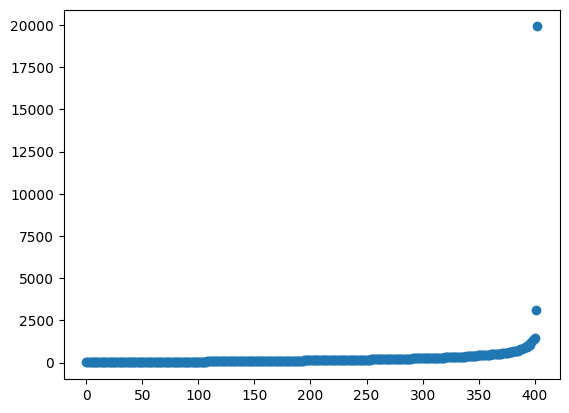

In [46]:
plt.scatter(x_values, precio_por_pedidos['revenue'])

In [47]:
np.percentile(precio_por_pedidos['revenue'], [90,95,99])

array([ 484.4  ,  673.73 , 1333.292])

El 90% de los pedidos tiene un precio menor o igual a 484.4

EL 95% de los pedidos tiene un precio menor o igual a  673.73

EL 99% de los pedidos tiene un precio menor o igual a 1333.292

In [48]:
from scipy.stats import levene
stat, p_value = levene(conversion_A_b['conversionA'], conversion_A_b['conversionB'])
print(f"Levene's test statistic: {stat}")
print(f"P-value: {p_value}")
alpha = 0.5
if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

Levene's test statistic: 0.0035001404977649
P-value: 0.9530196964879643
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes


In [49]:
t_stat, p_val = ss.ttest_ind (conversion_A_b['conversionA'], conversion_A_b['conversionB'], equal_var=False)
print(f'La media de conversion es: {t_stat}') 
print (f'El valor de alpha para la conversion_A_b es: {p_val}')

La media de conversion es: -1.7769345331895534
El valor de alpha para la conversion_A_b es: 0.08066583149981561


El valor negativo del estadístico t indica que la media de conversionA es más baja que la media de conversionB. El valor-p es de 0.0807 siendo mayor a alpha (0.05). Esto significa que no hay suficiente evidencia estadística para rechazar la hipótesis nula. Por tanto no podemos concluir que hay una diferencia significativa entre conversionA y conversionB

In [50]:
grupo = ["A", "B"]

for grupos in grupo:
    promedio = fct_experiment[fct_experiment["group"] == grupos]["ordenes"].mean()
    print(f"El promedio de los pedidos para el grupo {grupos} es de: {promedio}")

El promedio de los pedidos para el grupo A es de: 16.419354838709676
El promedio de los pedidos para el grupo B es de: 19.161290322580644


In [246]:
ventas_totales_A_B["tamano_promedio_A"] = ventas_totales_A_B["ventas_totalesA"] / ventas_totales_A_B["ordenesA"]
ventas_totales_A_B["tamano_promedio_B"] = ventas_totales_A_B["ventas_totalesB"] / ventas_totales_A_B["ordenesB"]

print(ventas_totales_A_B[["date", "tamano_promedio_A", "tamano_promedio_B"]])

         date  tamano_promedio_A  tamano_promedio_B
0  2019-08-01          98.547826          66.252632
1  2019-08-02          75.175000         109.325000
2  2019-08-03          75.633333         112.925000
3  2019-08-04          82.550000         110.786667
4  2019-08-05          82.420833          69.014286
5  2019-08-06          44.935294         137.800000
6  2019-08-07         116.029412         149.373913
7  2019-08-08          98.000000         105.026087
8  2019-08-09         203.953846          85.552381
9  2019-08-10         159.166667          76.127273
10 2019-08-11          91.608333          66.246154
11 2019-08-12         172.833333          80.442857
12 2019-08-13         292.635714          90.952381
13 2019-08-14          45.390476         119.495000
14 2019-08-15         104.384615         179.686207
15 2019-08-16          88.838889          95.905263
16 2019-08-17         102.642857          91.535714
17 2019-08-18          71.325000          81.214286
18 2019-08-1

In [250]:
from scipy.stats import levene
stat, p_value = levene(ventas_totales_A_B['tamano_promedio_A'], ventas_totales_A_B['tamano_promedio_A'])
print(f"Levene's test statistic: {stat}")
print(f"P-value: {p_value}")
alpha = 0.5
if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

Levene's test statistic: 0.0
P-value: 1.0
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes


In [249]:
from scipy.stats import ttest_ind

# Prueba t-test para comparar las medias de los dos grupos
t_stat, p_value = ttest_ind(ventas_totales_A_B["tamano_promedio_A"], ventas_totales_A_B["tamano_promedio_B"])

# Mostrar resultados
print("Estadístico t:", t_stat)
print("Valor p:", p_value)

Estadístico t: -0.6549532003397549
Valor p: 0.5150010519953879


In [223]:
alpha=0.05
sample_1 = fct_experiment.query("group == 'A'")["ordenes"]
sample_1

0     23
2     20
4     24
6     12
8     24
10    17
12    17
14    15
16    13
18    15
20    12
22    21
24    14
26    21
28    13
30    18
32     7
34    16
36    22
38    10
40    21
42    12
44    23
46    14
48     9
50    16
52    25
54    17
56    19
58     9
60    10
Name: ordenes, dtype: int64

In [228]:
alpha=0.05
sample_2 = fct_experiment.query("group == 'B'")["ordenes"]
sample_2

1     19
3     24
5     16
7     15
9     21
11    25
13    23
15    23
17    21
19    22
21    13
23    21
25    21
27    20
29    29
31    19
33    14
35     7
37    21
39    20
41    13
43    25
45    14
47    15
49    12
51    25
53    15
55    25
57    16
59    22
61    18
Name: ordenes, dtype: int64

In [229]:
from scipy import stats as st

resultados=st.ttest_ind(sample_1, sample_2, equal_var=False)
resultados_levene=st.levene(sample_1, sample_2)
print(f"p-value: {resultados.pvalue}")
print(f"p-value: {resultados_levene.pvalue}")

p-value: 0.03449858839747806
p-value: 0.6897878109197454


In [230]:
if resultados.pvalue < alpha:
    print("podemos rechazar la hipotesis nula 1")
else:
    print("No podemos rechazar la hipotesis nula")

podemos rechazar la hipotesis nula 1


In [231]:
if resultados_levene.pvalue < alpha:
    print("podemos rechazar la hipotesis nula 2")
else:
    print("No podemos rechazar la hipotesis nula")

No podemos rechazar la hipotesis nula


In [66]:
order

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


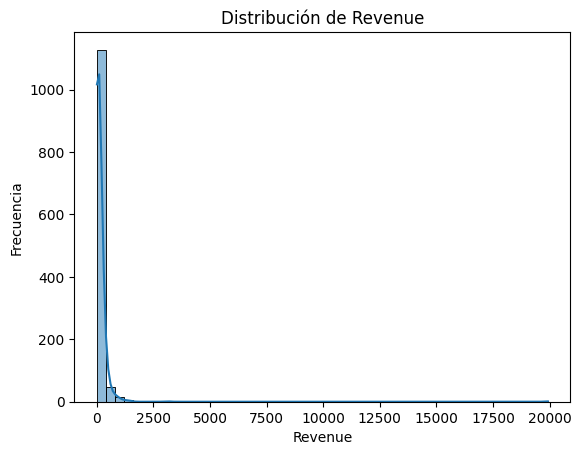

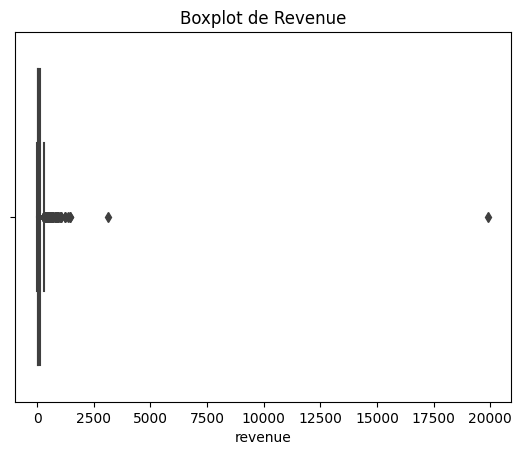

In [65]:
sns.histplot(order['revenue'], bins=50, kde=True)
plt.title("Distribución de Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot
sns.boxplot(x=order['revenue'])
plt.title("Boxplot de Revenue")
plt.show()

como se puede observar en las graficas y principalmente en la de boxplot, tenemos datos atipicos superioresa los cuales debemos eliminar para observar si estos provocaran una modificacion en la prueba de hipotesis

In [69]:
# Calcular el percentil inferior (1%) y superior (99%)
lower_percentile = np.percentile(order['revenue'], 1)
upper_percentile = np.percentile(order['revenue'], 99)

print(f"Percentil inferior (1%): {lower_percentile}")
print(f"Percentil superior (99%): {upper_percentile}")

Percentil inferior (1%): 5.5
Percentil superior (99%): 900.9039999999999


Se utilizan los percentiles (por ejemplo, el 1% inferior y el 1% superior) para detectar valores atípicos en la columna revenue (donde se encuntran los precios)

Percentil inferior (1%) es : 5.5
Esto significa que el 1% de los valores más bajos son menores o iguales a 5.5. siendo este el extremo inferior

Percentil superior (99%): 900.90
Esto significa que el 1% de los valores más altos de revenue superan los 900.90. Los pedidos que generan ingresos mayores a este valor son considerados valores atípicos hacia el extremo superior.

In [71]:
filtered_data = order[(order['revenue'] >= lower_percentile) & (order['revenue'] <= upper_percentile)]

# Ver el número de filas antes y después
print(f"Número de filas antes: {len(order)}")
print(f"Número de filas después: {len(filtered_data)}")

Número de filas antes: 1197
Número de filas después: 1174


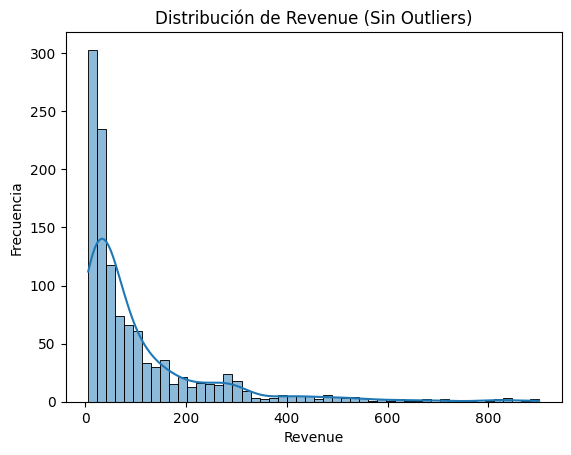

In [74]:
sns.histplot(filtered_data['revenue'], bins=50, kde=True)
plt.title("Distribución de Revenue (Sin Outliers)")
plt.xlabel("Revenue")
plt.ylabel("Frecuencia")
plt.show()

In [77]:
group_A = filtered_data[filtered_data['group'] == 'A']['revenue']
group_B = filtered_data[filtered_data['group'] == 'B']['revenue']

# Prueba de normalidad (Shapiro-Wilk)
_, p_value_A = shapiro(group_A)
_, p_value_B = shapiro(group_B)

print(f"Valor p para normalidad (Grupo A): {p_value_A}")
print(f"Valor p para normalidad (Grupo B): {p_value_B}")

if p_value_A > 0.05 and p_value_B > 0.05:
    print("Ambos grupos siguen una distribución normal. Usaremos la prueba t.")
    # Prueba t de Student
    t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)
else:
    print("Al menos un grupo no sigue una distribución normal. Usaremos Mann-Whitney U.")
    # Prueba Mann-Whitney U
    t_stat, p_value = mannwhitneyu(group_A, group_B)

print(f"Estadístico: {t_stat}")
print(f"Valor p: {p_value}")

Valor p para normalidad (Grupo A): 3.993343799432663e-31
Valor p para normalidad (Grupo B): 1.1218577190886174e-32
Al menos un grupo no sigue una distribución normal. Usaremos Mann-Whitney U.
Estadístico: 169230.0
Valor p: 0.7187329981164927


Prueba de Shapiro-Wilk:

Se utiliza para verificar si los datos siguen una distribución normal. Para  este caso el Grupo A tiene un valor p de 3.993e-31 (muy pequeño), indicando que los datos no son normales.
Grupo B tiene un valor p de 1.121e-32 (también muy pequeño), lo que confirma que tampoco sigue una distribución normal.
Debido a que ambos grupos no tienen una distribución normal, no es apropiado usar pruebas paramétricas como la t-test, que asume normalidad. En su lugar, usamos una prueba no paramétrica.

Valor estadístico de Mann-Whitney U:

El valor del estadístico es 169230.0. Este número no se interpreta directamente; sirve como base para calcular el valor p.
Valor p: 0.7187. Dado que el valor p es mayor que 0.05, no se puede rechazar la hipótesis nula. Por tanto no hay evidencia suficiente para concluir que existe una diferencia significativa en los ingresos (revenue) entre los grupos A y B.

In [78]:
from scipy.stats import ttest_ind

# Separar los datos por grupo
group_A = filtered_data[filtered_data['group'] == 'A']['revenue']
group_B = filtered_data[filtered_data['group'] == 'B']['revenue']

# Realizar la prueba t
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

Estadístico t: -0.15195430380626543
Valor p: 0.8792497697317376


Apesar de que no es buena opcion realizar la prueba t, se ha comprobado para saber el comportamiento de los datos sobre esta prueba en la cual. No se rechaza la hipótesis nula: No hay evidencia estadística para concluir que existe una diferencia significativa entre los ingresos promedio (revenue) de los grupos A y B

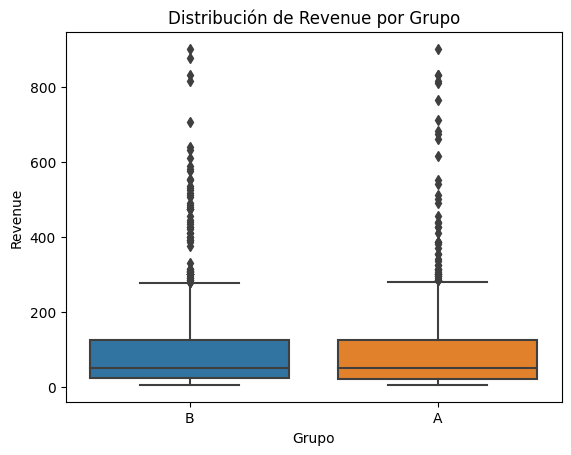

In [80]:
# Visualizar distribuciones por grupo
sns.boxplot(x='group', y='revenue', data=filtered_data)
plt.title("Distribución de Revenue por Grupo")
plt.xlabel("Grupo")
plt.ylabel("Revenue")
plt.show()

finalmete realizamos graficas boxplot para mostrar la distribucion de Revenue por grupo donde se puede visualizar que no hay una diferencia significativa entre los precios

# conclusion

Realizamos una prueba de hipotesis para que el depeartamento de Marketing pueda aumenta los ingresos, para esto se hizo una limpieza de datos, donde encontramos que existen visitantes que se encontraban en el grupo A como en el grupo B.
Se realizo el metodo ICE y RICE para saber que prueba de hipotesis podimamos considerar mejor justo para obtener un aumento de ingreso, para esto se tomo a considera utilizar el metodo RICE ya que cuenta con mas robustes en la prueba y podemos tener una mejor eficiencia al tomar una decision, Con esto se asume que lo mejor a trabajar seria en 'Add two new channels for attracting traffic. This will bring 30% more users.'
Posterior mente se realiza la conversion entre el grupo A y B para saber cual es mas eficiente, con los datos observados en las grafica se muestra que no existe visualmente una diferencia significativa, sin embargo con esto no podemos concluir por lo cual hemos realizado pruebas de hipotesis.
Se realizaron histogramas de los cuales se obtuvo que, no existe una clara distribucion diferente ya que la media para A es de 2.804718 y para B 3.282377 por lo tanto no hay una diferencia significativa,sin embargo no se pude concluir con estos datos hasta obtener datos estadisticos en los cuales el estadístico t indica que la media de conversionA es más baja que la media de conversionB. Por lo cual no hay suficiente evidencia estadística para rechazar la hipótesis nula 
El tamaño pequeño del efecto y el valor p relativamente alto, es posible que estemos cometiendo un error tipo II, es decir, no hemos detectado una diferencia real debido a la falta de poder estadístico. Apesar de que no existe una diferiecnia significativa en las medias. En el caso de los precio se ha removido los datos atipicos para saber si estos tienen algun efecto positivo o negativo en los resultados y volver a aplicar laspruebas de hipotesis. En las pruebas estadisticas realizadas el valor p es mayor que 0.05, por tanto se puede rechazar la hipótesis nula, es decir no hay evidencia suficiente para concluir que existe una diferencia significativa en los ingresos (revenue) entre los grupos A y B.
En base a los resultados de las pruebas de hipótesis para saber que  grupo es mejor y si la diferencia de mejora es significativa concluimos que ambos grupos tienen un rendimiento estadísticamente similar, esto implica que, desde el punto de vista de los datos, no podemos afirmar que uno de los grupos supere al otro de manera significativa.
no hay diferencia entre los grupos